In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.fABBA_test import fABBA

In [2]:
df = pd.read_csv("datasets/machine_temperature_system_failure.csv", header=0)

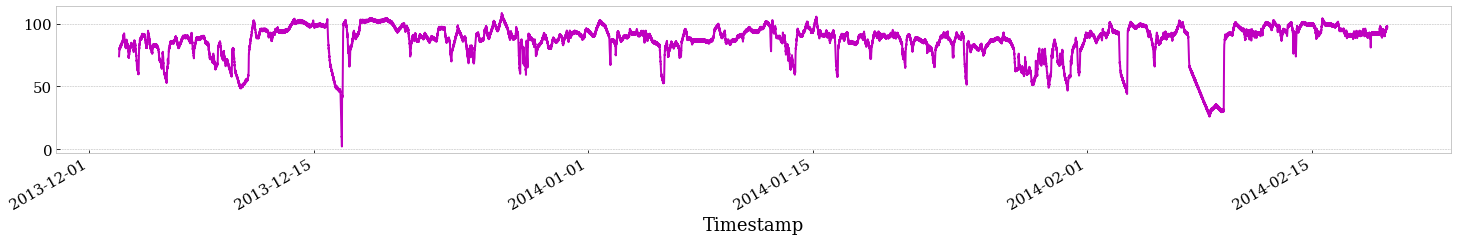

In [3]:
df['Timestamp'] = pd.to_datetime(df.timestamp)
df['Timestamp'].dt.strftime('%m-%d-%Y')
df.set_index('Timestamp', inplace=True)

plt.style.use('bmh')
plt.figure(figsize=(25,3))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 15})
plt.rc('font', family='serif')
ax = df['value'].plot(c='m')
plt.grid(axis='x')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('results/images/mt.pdf', bbox_inches='tight')
plt.show()

Compression: Reduced series of length 22695 to 72 segments. Digitization: Reduced 72 pieces to 58 symbols.


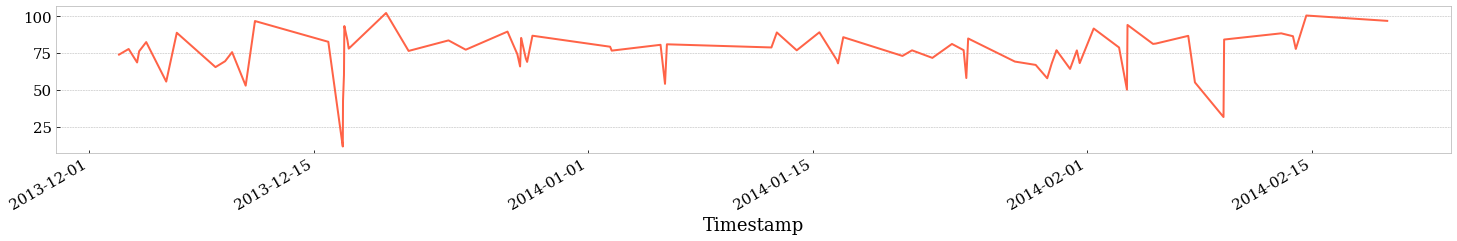

Compression: Reduced series of length 22695 to 96 segments. Digitization: Reduced 96 pieces to 76 symbols.


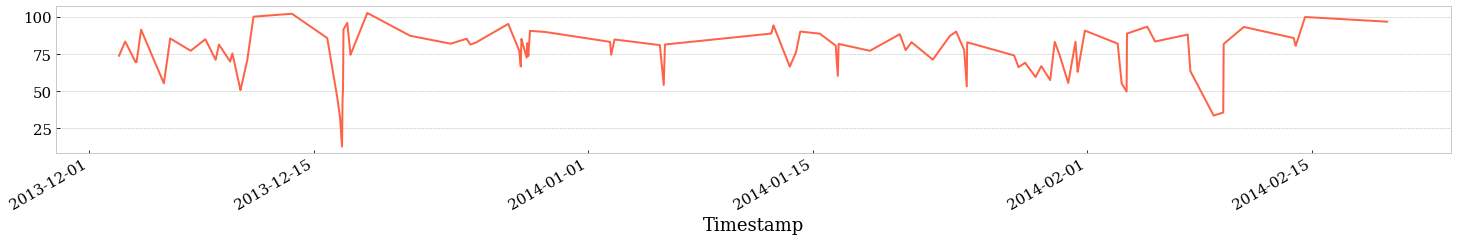

Compression: Reduced series of length 22695 to 215 segments. Digitization: Reduced 215 pieces to 138 symbols.


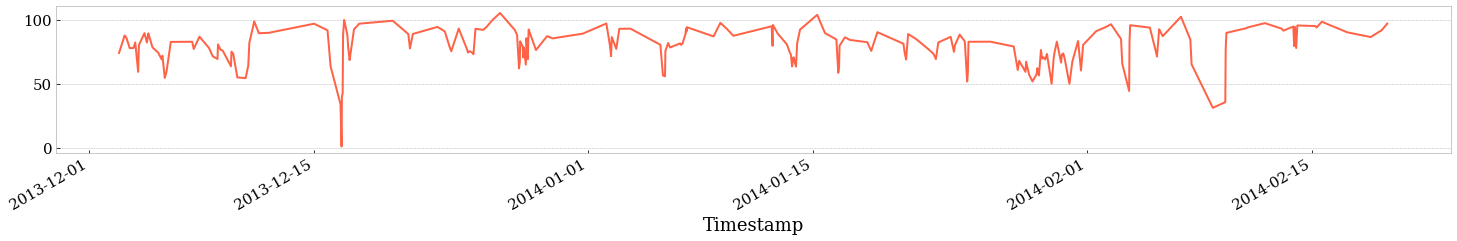

Compression: Reduced series of length 22695 to 1316 segments. Digitization: Reduced 1316 pieces to 387 symbols.


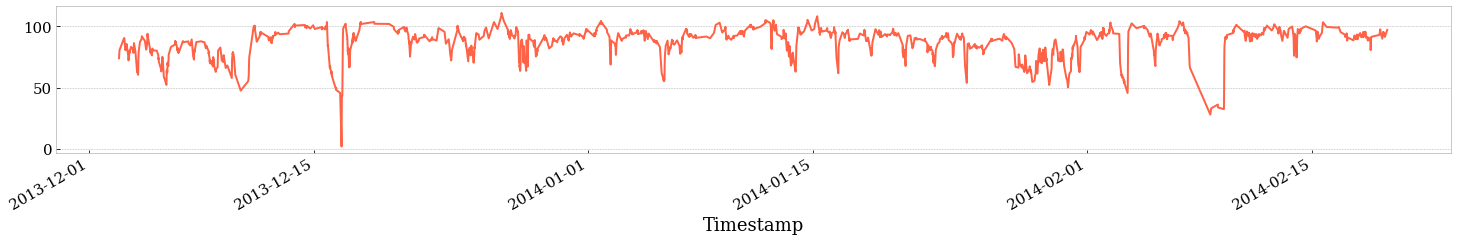

In [4]:
for i in [0.5, 0.3, 0.1, 0.01]:
    ts = df.value.values
    u = np.mean(ts)
    std = np.std(ts)
    ts = (ts - u) / std
    fabba = fABBA(tol=i, alpha=0.1, sorting='2-norm', scl=1, verbose=1, max_len=np.inf) 
    strings = fabba.fit_transform(ts)
    inverse_ts = fabba.inverse_transform(strings, ts[0])
    df['reconstructed'] = np.array(inverse_ts)*std + u
    plt.style.use('bmh')
    plt.figure(figsize=(25,3))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams.update({'font.size': 15})
    plt.rc('font', family='serif')
    df['reconstructed'].plot(c='tomato')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(axis='x')
    plt.savefig('results/images/reconst_mt{}.pdf'.format(i), bbox_inches='tight')
    plt.show()